In [1]:
import numpy as np 
from helpers import * 
from implementations import *
from utilities import *
import matplotlib.pyplot as plt

In [2]:
# hyperparameter tuning with only a part of the dataset
MAX_ROWS = 50000

x_data = np.genfromtxt('dataset/x_train.csv', delimiter=",", skip_header=1, max_rows=MAX_ROWS)
y_data = np.genfromtxt('dataset/y_train.csv', delimiter=",", skip_header=1, max_rows=MAX_ROWS)

In [3]:
# choose which type of cleaning is the best

x_train = clean_X_0(x_data)  # replace nan with zero add bias column
y_train = clean_Y(y_data)

accuracy_zeros, f1_score_zeros = k_fold_cross_validation(x_train, y_train, logistic_regression, k= 5,
                                             model_params={'initial_w': np.random.rand(x_train.shape[1]),'max_iters': 5000, 'gamma':0.25})

print(f'nan -> 0 f1-score : {f1_score_zeros}, accuracy {accuracy_zeros}')

x_train = clean_X_median(x_data)  # replace nan with median add bias column

accuracy_median, f1_score_median = k_fold_cross_validation(x_train, y_train, logistic_regression, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]),'max_iters': 5000, 'gamma':0.25})

print(f'nan -> median f1-score :{f1_score_median}, accuracy {accuracy_median}')


x_train = clean_X_mean(x_data)  # replace nan with mean add bias column

accuracy_mean, f1_score_mean = k_fold_cross_validation(x_train, y_train, logistic_regression, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]), 'max_iters': 5000, 'gamma':0.25})

print(f'nan -> mean f1-score :{f1_score_mean}, accuracy {accuracy_mean}')



/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:146: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:146: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


nan -> 0 f1-score : 0.2406820862321021, accuracy 0.9176
nan -> median f1-score :0.29866759083903066, accuracy 0.63974
nan -> mean f1-score :0.2123049183929238, accuracy 0.9155000000000001


In [6]:

# feature selection

x_train = reduced_data(x_data, 0.9)
x_train = clean_X_0(x_train)  # replace nan with zero add bias column
y_train = clean_Y(y_data)

accuracy, f1_score = k_fold_cross_validation(x_train, y_train, logistic_regression, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]), 'max_iters': 5000, 'gamma':0.25})

print(f'without sparse column f1-score :{f1_score}, accuracy {accuracy}')


x_train = drop_highly_correlated_features(x_data)
x_train = clean_X_0(x_train)  # replace nan with zero add bias column
y_train = clean_Y(y_data)

accuracy, f1_score = k_fold_cross_validation(x_train, y_train, logistic_regression, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]), 'max_iters': 5000, 'gamma':0.25})

print(f'without correlated column f1-score :{f1_score}, accuracy {accuracy}')


x_train = clean_X_0(x_data)  # replace nan with zero add bias column
y_train = clean_Y(y_data)

accuracy, f1_score = k_fold_cross_validation(x_train, y_train, logistic_regression, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]), 'max_iters': 5000, 'gamma':0.25})

print(f'without dropping anything f1-score :{f1_score}, accuracy {accuracy}')

without sparse column f1-score :0.19768532627263152, accuracy 0.9152199999999999
without correlated column f1-score :0.2417358777829377, accuracy 0.91762
without dropping anything f1-score :0.23939583076846005, accuracy 0.9174599999999999


In [12]:
# x_train = drop_highly_correlated_features(x_data)
x_train = normalize(clean_X_0(x_data))
y_train = clean_Y(y_data)

initial_w = np.random.rand(x_train.shape[1])

best_param_lambda, best_param_gamma, = hyperparameter_tuning(x_train, y_train , 
                                            reg_logistic_regression, lambdas= [0, 1e-4, 1e-5], gammas=[0.15, 0.2, 0.25, 0.3, 0.35], 
                                            model_params={'initial_w': initial_w ,'max_iters': 5000})


best_param_lambda, best_param_gamma

#  lambda= 0.0001, gamma= 0.25,


/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:146: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:146: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


KeyboardInterrupt: 

In [3]:
# finding best threshold make it more likely to predict 

accuracies = []
f1_scores = []

x_train, x_test, y_train, y_test = split_data(x_data, y_data, 0.8)
x_train = normalize(clean_X_0(x_train))
y_train = clean_Y(y_train)
x_test = normalize(clean_X_0(x_test))
y_test = clean_Y(y_test)

initial_w  = np.random.rand(x_train.shape[1])

w, loss = reg_logistic_regression(y_train.reshape(-1, 1), x_train, initial_w=initial_w.reshape(-1, 1),
                                  lambda_= 1e-4, max_iters=10000, gamma=0.25) 


/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:146: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:146: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


best threshodl =  0.30999999999999994


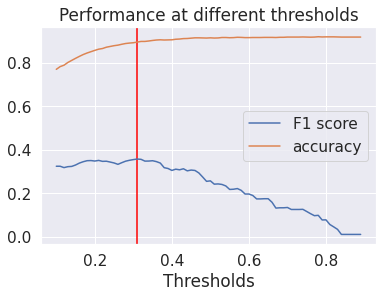

In [ ]:
thresholds = np.arange(0.1, 0.9, 0.01)

f1_scores = []
accuracies = []

for t in thresholds:
    y_pred = predict_logistic(x_test, w, t)
    accuracy = np.mean(y_pred == y_test)
    f1 = compute_f1(y_test, y_pred)
    accuracies.append(accuracy)
    f1_scores.append(f1)

max_f1_score = max(f1_scores)

f1_score_pos = np.where(max_f1_score == (f1_scores))
threshold_max = thresholds[f1_score_pos[0][0]]
print('best threshodl = ', threshold_max)

# plt.scatter(threshold_max, max_f1_score, color='red', s=100, zorder=5)
plt.axvline(x=threshold_max, color = 'red')
plt.plot(thresholds, f1_scores, label ='F1 score')
plt.plot(thresholds, accuracies, label='accuracy')
plt.xlabel('Thresholds')
plt.title('Performance at different thresholds')
plt.legend()
plt.savefig('bestf1_score.png')
plt.show()

In [41]:
predict_logistic(x_test, w, 0.31).sum() / len(y_pred)

0.082

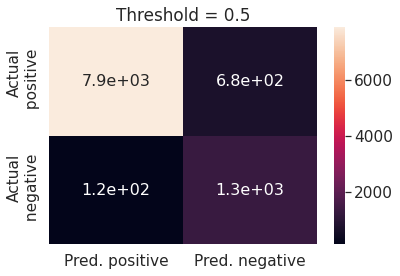

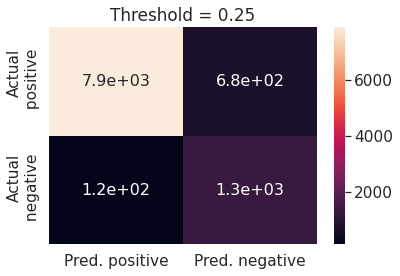

In [9]:

import seaborn as sn
import pandas as pd # just for plotting not used in the actualy data analysis
import matplotlib.pyplot as plt


TP, FP, TN, FN = calculate_metrics(y_test, predict_logistic(x_train, w, 0.5))

array = [[ TN, FN],[TP, FP]]

df_cm = pd.DataFrame(array, ['Actual\n positive', 'Actual\n negative'], ['Pred. positive', 'Pred. negative'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.title('Threshold = 0.5')
plt.yticks(rotation=90)
plt.savefig('0.5threshold.png')
plt.show()

TP, FP, TN, FN = calculate_metrics(y_test, predict_logistic(x_train, w, 0.5))

array = [[ TN, FN],[TP, FP]]

df_cm = pd.DataFrame(array, ['Actual\n positive', 'Actual\n negative'], ['Pred. positive', 'Pred. negative'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
plt.title('Threshold = 0.25')
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.yticks(rotation=90) 
plt.savefig('0.2threshold.png')
    
plt.show()

In [12]:
# load dataset for final training and prediction on test set

x_data = np.genfromtxt('dataset/x_train.csv', delimiter=",", skip_header=1)
y_data = np.genfromtxt('dataset/y_train.csv', delimiter=",", skip_header=1)
x_test = np.genfromtxt('dataset/x_test.csv', delimiter=",", skip_header=1)

# should be added
# x_train = drop_highly_correlated_features(x_data)


In [13]:
best_param_lambda = 0
best_param_gamma = 0.2
threshold_max = 0.23

In [14]:
x_test_clean = normalize(clean_X_0(x_test))
y_data = clean_Y(y_data)
x_data = normalize(clean_X_0(x_data))


initial_w = np.random.rand(x_data.shape[1])

# train with optimal hyperparameters
w, loss = reg_logistic_regression(y_data.reshape(-1, 1), x_data,  best_param_lambda , initial_w.reshape(-1, 1),  10000, best_param_gamma) 


# predict with optimal threshold
y_pred = (sigmoid(x_test_clean @ w) >= threshold_max).flatten() 
y_pred = np.where(y_pred, 1, -1)

# create_csv_submission(x_test[:, 0], y_pred, 'prediction.csv')

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:146: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:146: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


In [45]:

x_test_clean = normalize(clean_X_0(x_test))

y_pred = (sigmoid(x_test_clean @ w) >= 0.5).flatten() 
y_pred = np.where(y_pred, 1, -1)

(y_pred == 1).sum() / len(y_pred)

0.4839320162005504